In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files

# Upload the Kaggle API key JSON file
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"marriumjilani","key":"7b46fd61e283b12571293db419d941c4"}'}

In [ ]:
import os

os.makedirs("/root/.kaggle", exist_ok=True)
os.rename("kaggle.json", "/root/.kaggle/kaggle.json")

# setting permissions for the Kaggle configuration file
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset


 95% 114M/121M [00:01<00:00, 86.0MB/s]
100% 121M/121M [00:01<00:00, 87.9MB/s]


In [ ]:
!unzip /content/face-expression-recognition-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
import  os
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import keras
import  tensorflow as tf


In [ ]:
train = "/content/images/train"
train_names =[]
train_names =[f for f in sorted(os.listdir(train))]
print(len(train_names))

7


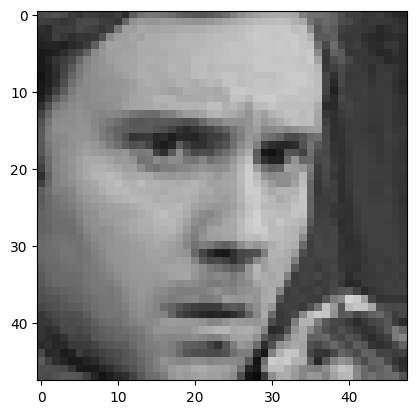

(48, 48, 3)


In [ ]:
image_path = train + '/angry/0.jpg'
image = cv2.imread(image_path)
plt.imshow(image)
plt.show()
print(image.shape)

In [ ]:
validation = "/content/images/validation"
validation_names =[]
validation_names = [f for f in sorted(os.listdir(validation))]
print(len(validation_names))

7


In [ ]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0
print('Images in each category')
for i in range(len(train_names)):
    folder_path = train + '/' + str(train_names[i])
    category_dict[i] = train_names[i]

    image_names = [img for img in sorted(os.listdir(folder_path))]

    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names

    print('%s: %d' %(train_names[i], images_per_category_dict[i]))
    total_images += images_per_category_dict[i]

print('Total images in training data: %d' %(total_images))

Images in each category
angry: 3993
disgust: 436
fear: 4103
happy: 7164
neutral: 4982
sad: 4938
surprise: 3205
Total images in training data: 28821


In [ ]:
category_dict = {}
images_per_category_dict = {}
category_images_path_dict = {}

total_images = 0

for i in range(len(validation_names)):
    folder_path = validation + '/' + str(validation_names[i])
    category_dict[i] = validation_names[i]

    image_names = [img for img in sorted(os.listdir(folder_path))]

    images_per_category_dict[i] = len(image_names)
    category_images_path_dict[i] = image_names

    print('%s: %d' %(validation_names[i], images_per_category_dict[i]))
    total_images += images_per_category_dict[i]

print('Total images in validation data: %d' %(total_images))

angry: 960
disgust: 111
fear: 1018
happy: 1825
neutral: 1216
sad: 1139
surprise: 797
Total images in validation data: 7066


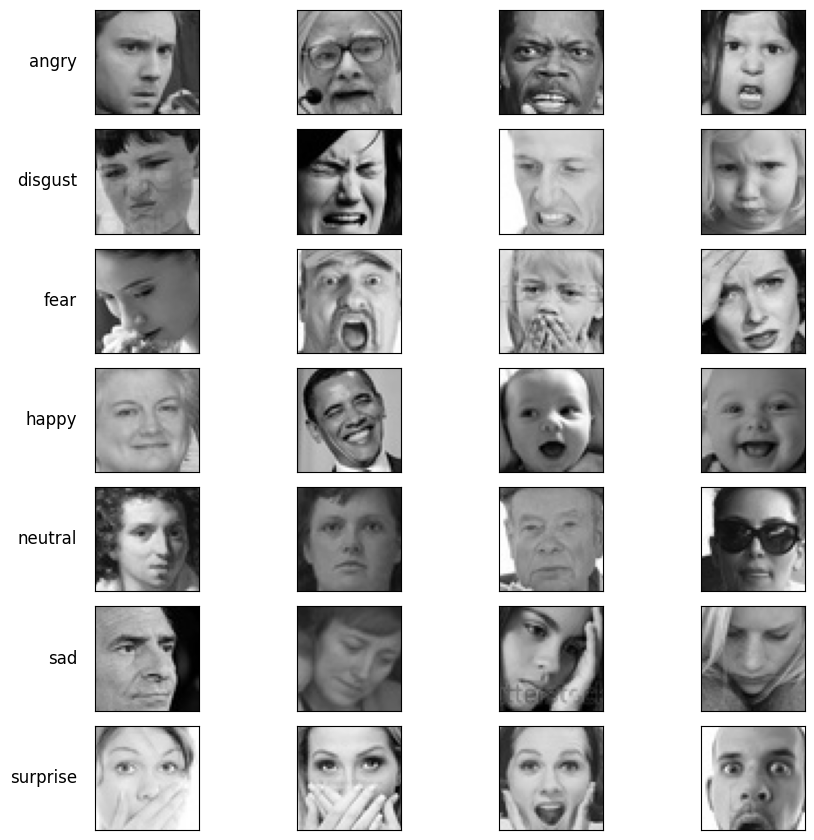

In [ ]:
fig,ax = plt.subplots(nrows=7,ncols=4)
fig.set_size_inches(9.5,8.5)
fig.subplots_adjust(wspace=0.1,hspace=0.1)

for i in range(len(train_names)):
    folder_path = train + '/' + str(train_names[i])
    image_names = [img for img in sorted(os.listdir(folder_path))][:4]

    for j in range(len(image_names)):
        image_path = folder_path + '/' + image_names[j]
        image = cv2.imread(image_path)
        ax[i,j].imshow(image)
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
        if j == 0:
            ax[i,j].annotate(train_names[i], xy=(0, 0.5), xytext=(-ax[i,j].yaxis.labelpad - 5,0),
                xycoords=ax[i,j].yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

fig.tight_layout()


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train,target_size=(48,48),batch_size=128,class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(validation,target_size=(48, 48),batch_size=128,class_mode='categorical')

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from keras import layers
from keras import  models

model =models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(48,48,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(7,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [ ]:
tf.random.set_seed(42)
import random
random.seed(42)

In [ ]:
from keras import  optimizers
model.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(learning_rate=0.0001),metrics=['accuracy'])

In [ ]:
callback = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',monitor='val_acc', mode='max',verbose=1, save_best_only=True)

In [ ]:
history = model.fit(train_generator,epochs=60,validation_data=validation_generator,verbose=1,callbacks=[callback])

Epoch 1/60
226/226 [==============================] - ETA: 0s - loss: 1.1784 - accuracy: 0.5655

226/226 [==============================] - 75s 330ms/step - loss: 1.1784 - accuracy: 0.5655 - val_loss: 1.2685 - val_accuracy: 0.5280
Epoch 2/60
226/226 [==============================] - ETA: 0s - loss: 1.1669 - accuracy: 0.5689

226/226 [==============================] - 74s 328ms/step - loss: 1.1669 - accuracy: 0.5689 - val_loss: 1.2689 - val_accuracy: 0.5311
Epoch 3/60
226/226 [==============================] - ETA: 0s - loss: 1.1542 - accuracy: 0.5754

226/226 [==============================] - 75s 330ms/step - loss: 1.1542 - accuracy: 0.5754 - val_loss: 1.2509 - val_accuracy: 0.5341
Epoch 4/60
226/226 [==============================] - ETA: 0s - loss: 1.1443 - accuracy: 0.5792

226/226 [==============================] - 74s 327ms/step - loss: 1.1443 - accuracy: 0.5792 - val_loss: 1.2591 - val_accuracy: 0.5269
Epoch 5/60
226/226 [==============================] - ETA: 0s - loss: 1.1338 - accuracy: 0.5825

226/226 [==============================] - 74s 328ms/step - loss: 1.1338 - accuracy: 0.5825 - val_loss: 1.2409 - val_accuracy: 0.5396
Epoch 6/60
226/226 [==============================] - ETA: 0s - loss: 1.1258 - accuracy: 0.5862

226/226 [==============================] - 74s 328ms/step - loss: 1.1258 - accuracy: 0.5862 - val_loss: 1.2352 - val_accuracy: 0.5464
Epoch 7/60
226/226 [==============================] - ETA: 0s - loss: 1.1131 - accuracy: 0.5925

226/226 [==============================] - 74s 329ms/step - loss: 1.1131 - accuracy: 0.5925 - val_loss: 1.2411 - val_accuracy: 0.5391
Epoch 8/60
226/226 [==============================] - ETA: 0s - loss: 1.1003 - accuracy: 0.5970

226/226 [==============================] - 74s 328ms/step - loss: 1.1003 - accuracy: 0.5970 - val_loss: 1.2531 - val_accuracy: 0.5388
Epoch 9/60
226/226 [==============================] - ETA: 0s - loss: 1.0925 - accuracy: 0.6012

226/226 [==============================] - 74s 329ms/step - loss: 1.0925 - accuracy: 0.6012 - val_loss: 1.2403 - val_accuracy: 0.5419
Epoch 10/60
226/226 [==============================] - ETA: 0s - loss: 1.0835 - accuracy: 0.6039

226/226 [==============================] - 74s 328ms/step - loss: 1.0835 - accuracy: 0.6039 - val_loss: 1.2475 - val_accuracy: 0.5359
Epoch 11/60
226/226 [==============================] - ETA: 0s - loss: 1.0724 - accuracy: 0.6082

226/226 [==============================] - 75s 330ms/step - loss: 1.0724 - accuracy: 0.6082 - val_loss: 1.2401 - val_accuracy: 0.5430
Epoch 12/60
226/226 [==============================] - ETA: 0s - loss: 1.0608 - accuracy: 0.6095

226/226 [==============================] - 80s 352ms/step - loss: 1.0608 - accuracy: 0.6095 - val_loss: 1.2426 - val_accuracy: 0.5393
Epoch 13/60
226/226 [==============================] - ETA: 0s - loss: 1.0482 - accuracy: 0.6178

226/226 [==============================] - 74s 328ms/step - loss: 1.0482 - accuracy: 0.6178 - val_loss: 1.2239 - val_accuracy: 0.5485
Epoch 14/60
226/226 [==============================] - ETA: 0s - loss: 1.0362 - accuracy: 0.6231

226/226 [==============================] - 74s 329ms/step - loss: 1.0362 - accuracy: 0.6231 - val_loss: 1.2296 - val_accuracy: 0.5500
Epoch 15/60
226/226 [==============================] - ETA: 0s - loss: 1.0296 - accuracy: 0.6243

226/226 [==============================] - 75s 330ms/step - loss: 1.0296 - accuracy: 0.6243 - val_loss: 1.2544 - val_accuracy: 0.5386
Epoch 16/60
226/226 [==============================] - ETA: 0s - loss: 1.0191 - accuracy: 0.6305

226/226 [==============================] - 74s 329ms/step - loss: 1.0191 - accuracy: 0.6305 - val_loss: 1.2156 - val_accuracy: 0.5556
Epoch 17/60
226/226 [==============================] - ETA: 0s - loss: 1.0098 - accuracy: 0.6355

226/226 [==============================] - 74s 329ms/step - loss: 1.0098 - accuracy: 0.6355 - val_loss: 1.2150 - val_accuracy: 0.5562
Epoch 18/60
226/226 [==============================] - ETA: 0s - loss: 1.0007 - accuracy: 0.6367

226/226 [==============================] - 74s 329ms/step - loss: 1.0007 - accuracy: 0.6367 - val_loss: 1.2255 - val_accuracy: 0.5507
Epoch 19/60
226/226 [==============================] - ETA: 0s - loss: 0.9928 - accuracy: 0.6401

226/226 [==============================] - 75s 330ms/step - loss: 0.9928 - accuracy: 0.6401 - val_loss: 1.2323 - val_accuracy: 0.5478
Epoch 20/60
226/226 [==============================] - ETA: 0s - loss: 0.9788 - accuracy: 0.6452

226/226 [==============================] - 74s 329ms/step - loss: 0.9788 - accuracy: 0.6452 - val_loss: 1.2274 - val_accuracy: 0.5543
Epoch 21/60
226/226 [==============================] - ETA: 0s - loss: 0.9699 - accuracy: 0.6479

226/226 [==============================] - 74s 328ms/step - loss: 0.9699 - accuracy: 0.6479 - val_loss: 1.2238 - val_accuracy: 0.5522
Epoch 22/60
226/226 [==============================] - ETA: 0s - loss: 0.9677 - accuracy: 0.6507

226/226 [==============================] - 74s 329ms/step - loss: 0.9677 - accuracy: 0.6507 - val_loss: 1.2770 - val_accuracy: 0.5292
Epoch 23/60
226/226 [==============================] - ETA: 0s - loss: 0.9521 - accuracy: 0.6569

226/226 [==============================] - 74s 329ms/step - loss: 0.9521 - accuracy: 0.6569 - val_loss: 1.2246 - val_accuracy: 0.5562
Epoch 24/60
225/226 [============================>.] - ETA: 0s - loss: 0.9406 - accuracy: 0.6614

226/226 [==============================] - 75s 330ms/step - loss: 0.9407 - accuracy: 0.6613 - val_loss: 1.2406 - val_accuracy: 0.5502
Epoch 25/60
226/226 [==============================] - ETA: 0s - loss: 0.9364 - accuracy: 0.6631

226/226 [==============================] - 74s 329ms/step - loss: 0.9364 - accuracy: 0.6631 - val_loss: 1.2478 - val_accuracy: 0.5464
Epoch 26/60
226/226 [==============================] - ETA: 0s - loss: 0.9227 - accuracy: 0.6666

226/226 [==============================] - 74s 328ms/step - loss: 0.9227 - accuracy: 0.6666 - val_loss: 1.2179 - val_accuracy: 0.5611
Epoch 27/60
226/226 [==============================] - ETA: 0s - loss: 0.9157 - accuracy: 0.6698

226/226 [==============================] - 74s 329ms/step - loss: 0.9157 - accuracy: 0.6698 - val_loss: 1.2270 - val_accuracy: 0.5582
Epoch 28/60
226/226 [==============================] - ETA: 0s - loss: 0.9061 - accuracy: 0.6750

226/226 [==============================] - 74s 328ms/step - loss: 0.9061 - accuracy: 0.6750 - val_loss: 1.2272 - val_accuracy: 0.5573
Epoch 29/60
226/226 [==============================] - ETA: 0s - loss: 0.8963 - accuracy: 0.6792

226/226 [==============================] - 74s 328ms/step - loss: 0.8963 - accuracy: 0.6792 - val_loss: 1.2292 - val_accuracy: 0.5576
Epoch 30/60
226/226 [==============================] - ETA: 0s - loss: 0.8833 - accuracy: 0.6838

226/226 [==============================] - 74s 329ms/step - loss: 0.8833 - accuracy: 0.6838 - val_loss: 1.2278 - val_accuracy: 0.5601
Epoch 31/60
226/226 [==============================] - ETA: 0s - loss: 0.8764 - accuracy: 0.6866

226/226 [==============================] - 74s 329ms/step - loss: 0.8764 - accuracy: 0.6866 - val_loss: 1.2660 - val_accuracy: 0.5505
Epoch 32/60
226/226 [==============================] - ETA: 0s - loss: 0.8684 - accuracy: 0.6914

226/226 [==============================] - 74s 328ms/step - loss: 0.8684 - accuracy: 0.6914 - val_loss: 1.2339 - val_accuracy: 0.5592
Epoch 33/60
226/226 [==============================] - ETA: 0s - loss: 0.8596 - accuracy: 0.6924

226/226 [==============================] - 74s 328ms/step - loss: 0.8596 - accuracy: 0.6924 - val_loss: 1.2567 - val_accuracy: 0.5515
Epoch 34/60
226/226 [==============================] - ETA: 0s - loss: 0.8488 - accuracy: 0.6971

226/226 [==============================] - 74s 329ms/step - loss: 0.8488 - accuracy: 0.6971 - val_loss: 1.2376 - val_accuracy: 0.5543
Epoch 35/60
226/226 [==============================] - ETA: 0s - loss: 0.8407 - accuracy: 0.7025

226/226 [==============================] - 75s 330ms/step - loss: 0.8407 - accuracy: 0.7025 - val_loss: 1.2580 - val_accuracy: 0.5573
Epoch 36/60
226/226 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.7036

226/226 [==============================] - 74s 329ms/step - loss: 0.8303 - accuracy: 0.7036 - val_loss: 1.2480 - val_accuracy: 0.5549
Epoch 37/60
226/226 [==============================] - ETA: 0s - loss: 0.8205 - accuracy: 0.7092

226/226 [==============================] - 74s 329ms/step - loss: 0.8205 - accuracy: 0.7092 - val_loss: 1.2843 - val_accuracy: 0.5565
Epoch 38/60
226/226 [==============================] - ETA: 0s - loss: 0.8123 - accuracy: 0.7127

226/226 [==============================] - 74s 329ms/step - loss: 0.8123 - accuracy: 0.7127 - val_loss: 1.2510 - val_accuracy: 0.5643
Epoch 39/60
226/226 [==============================] - ETA: 0s - loss: 0.7997 - accuracy: 0.7159

226/226 [==============================] - 74s 329ms/step - loss: 0.7997 - accuracy: 0.7159 - val_loss: 1.2553 - val_accuracy: 0.5617
Epoch 40/60
226/226 [==============================] - ETA: 0s - loss: 0.7939 - accuracy: 0.7160

226/226 [==============================] - 74s 329ms/step - loss: 0.7939 - accuracy: 0.7160 - val_loss: 1.2592 - val_accuracy: 0.5587
Epoch 41/60
226/226 [==============================] - ETA: 0s - loss: 0.7820 - accuracy: 0.7258

226/226 [==============================] - 74s 328ms/step - loss: 0.7820 - accuracy: 0.7258 - val_loss: 1.3262 - val_accuracy: 0.5324
Epoch 42/60
226/226 [==============================] - ETA: 0s - loss: 0.7745 - accuracy: 0.7242

226/226 [==============================] - 74s 328ms/step - loss: 0.7745 - accuracy: 0.7242 - val_loss: 1.2673 - val_accuracy: 0.5613
Epoch 43/60
226/226 [==============================] - ETA: 0s - loss: 0.7678 - accuracy: 0.7291

226/226 [==============================] - 74s 328ms/step - loss: 0.7678 - accuracy: 0.7291 - val_loss: 1.2686 - val_accuracy: 0.5577
Epoch 44/60
226/226 [==============================] - ETA: 0s - loss: 0.7597 - accuracy: 0.7322

226/226 [==============================] - 74s 328ms/step - loss: 0.7597 - accuracy: 0.7322 - val_loss: 1.2769 - val_accuracy: 0.5647
Epoch 45/60
226/226 [==============================] - ETA: 0s - loss: 0.7472 - accuracy: 0.7380

226/226 [==============================] - 74s 327ms/step - loss: 0.7472 - accuracy: 0.7380 - val_loss: 1.2991 - val_accuracy: 0.5575
Epoch 46/60
226/226 [==============================] - ETA: 0s - loss: 0.7364 - accuracy: 0.7417

226/226 [==============================] - 74s 327ms/step - loss: 0.7364 - accuracy: 0.7417 - val_loss: 1.2824 - val_accuracy: 0.5583
Epoch 47/60
226/226 [==============================] - ETA: 0s - loss: 0.7274 - accuracy: 0.7444

226/226 [==============================] - 74s 329ms/step - loss: 0.7274 - accuracy: 0.7444 - val_loss: 1.3028 - val_accuracy: 0.5535
Epoch 48/60
226/226 [==============================] - ETA: 0s - loss: 0.7216 - accuracy: 0.7464

226/226 [==============================] - 74s 329ms/step - loss: 0.7216 - accuracy: 0.7464 - val_loss: 1.3291 - val_accuracy: 0.5470
Epoch 49/60
225/226 [============================>.] - ETA: 0s - loss: 0.7150 - accuracy: 0.7478

226/226 [==============================] - 74s 329ms/step - loss: 0.7148 - accuracy: 0.7480 - val_loss: 1.3242 - val_accuracy: 0.5484
Epoch 50/60
226/226 [==============================] - ETA: 0s - loss: 0.7000 - accuracy: 0.7559

226/226 [==============================] - 74s 329ms/step - loss: 0.7000 - accuracy: 0.7559 - val_loss: 1.3049 - val_accuracy: 0.5560
Epoch 51/60
226/226 [==============================] - ETA: 0s - loss: 0.6968 - accuracy: 0.7550

226/226 [==============================] - 74s 328ms/step - loss: 0.6968 - accuracy: 0.7550 - val_loss: 1.3149 - val_accuracy: 0.5572
Epoch 52/60
226/226 [==============================] - ETA: 0s - loss: 0.6790 - accuracy: 0.7633

226/226 [==============================] - 74s 328ms/step - loss: 0.6790 - accuracy: 0.7633 - val_loss: 1.3399 - val_accuracy: 0.5505
Epoch 53/60
226/226 [==============================] - ETA: 0s - loss: 0.6824 - accuracy: 0.7602

226/226 [==============================] - 74s 329ms/step - loss: 0.6824 - accuracy: 0.7602 - val_loss: 1.4189 - val_accuracy: 0.5297
Epoch 54/60
226/226 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.7667

226/226 [==============================] - 74s 329ms/step - loss: 0.6692 - accuracy: 0.7667 - val_loss: 1.3245 - val_accuracy: 0.5604
Epoch 55/60
226/226 [==============================] - ETA: 0s - loss: 0.6525 - accuracy: 0.7736

226/226 [==============================] - 74s 329ms/step - loss: 0.6525 - accuracy: 0.7736 - val_loss: 1.3407 - val_accuracy: 0.5553
Epoch 56/60
226/226 [==============================] - ETA: 0s - loss: 0.6467 - accuracy: 0.7763

226/226 [==============================] - 74s 327ms/step - loss: 0.6467 - accuracy: 0.7763 - val_loss: 1.3692 - val_accuracy: 0.5546
Epoch 57/60
226/226 [==============================] - ETA: 0s - loss: 0.6446 - accuracy: 0.7752

226/226 [==============================] - 74s 328ms/step - loss: 0.6446 - accuracy: 0.7752 - val_loss: 1.3603 - val_accuracy: 0.5586
Epoch 58/60
226/226 [==============================] - ETA: 0s - loss: 0.6357 - accuracy: 0.7796

226/226 [==============================] - 79s 351ms/step - loss: 0.6357 - accuracy: 0.7796 - val_loss: 1.3848 - val_accuracy: 0.5586
Epoch 59/60
226/226 [==============================] - ETA: 0s - loss: 0.6278 - accuracy: 0.7813

226/226 [==============================] - 74s 327ms/step - loss: 0.6278 - accuracy: 0.7813 - val_loss: 1.3764 - val_accuracy: 0.5565
Epoch 60/60
226/226 [==============================] - ETA: 0s - loss: 0.6103 - accuracy: 0.7906

226/226 [==============================] - 74s 328ms/step - loss: 0.6103 - accuracy: 0.7906 - val_loss: 1.3673 - val_accuracy: 0.5601


In [ ]:
model.save("FaceExpressionModel.keras")

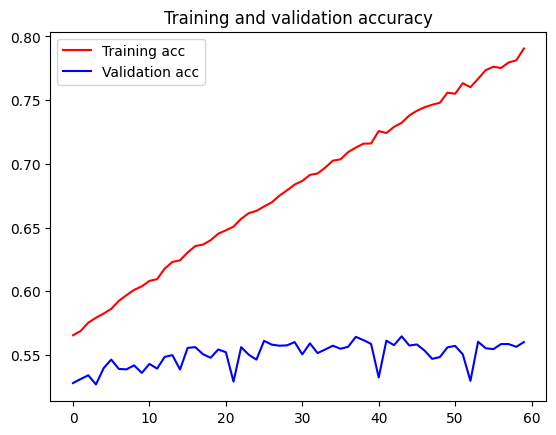

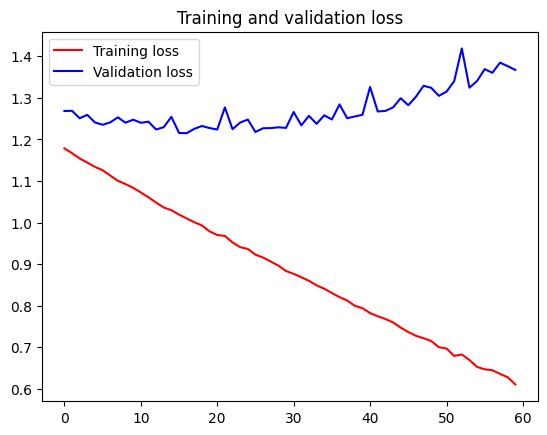

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Original class: fear
1/1 [==============================] - 0s 85ms/step
Predicted class: fear


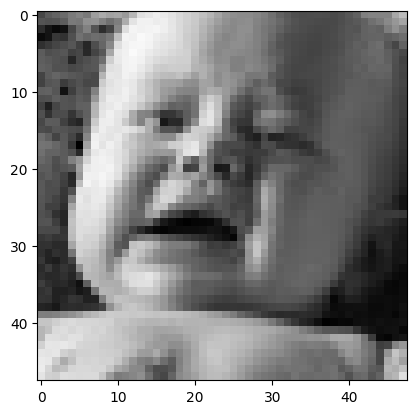

Original class: sad
1/1 [==============================] - 0s 15ms/step
Predicted class: neutral


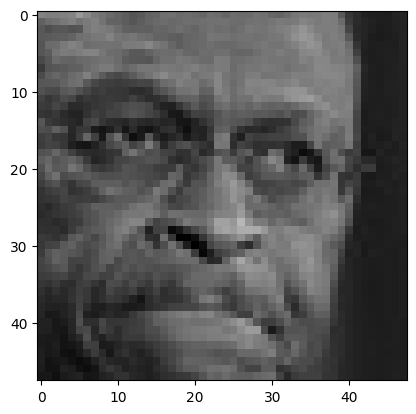

Original class: happy
1/1 [==============================] - 0s 15ms/step
Predicted class: fear


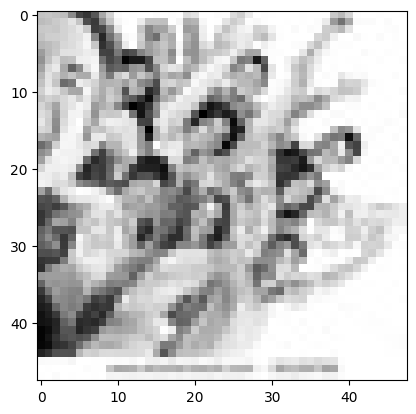

Original class: angry
1/1 [==============================] - 0s 17ms/step
Predicted class: fear


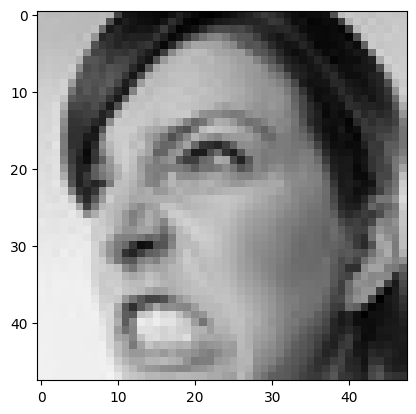

Original class: fear
1/1 [==============================] - 0s 14ms/step
Predicted class: sad


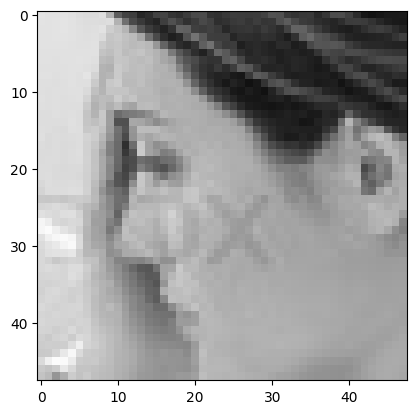

Original class: sad
1/1 [==============================] - 0s 19ms/step
Predicted class: sad


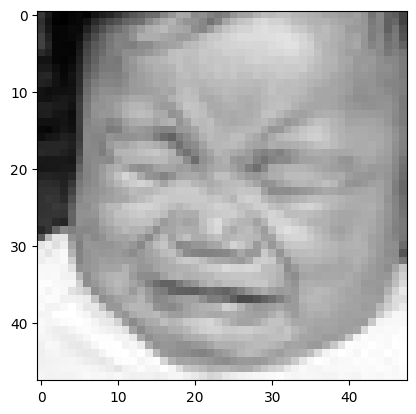

Original class: happy
1/1 [==============================] - 0s 16ms/step
Predicted class: happy


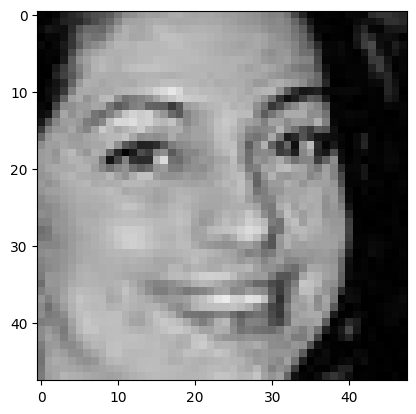

Original class: disgust
1/1 [==============================] - 0s 15ms/step
Predicted class: disgust


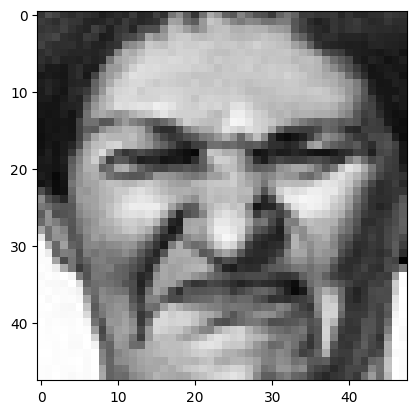

Original class: happy
1/1 [==============================] - 0s 17ms/step
Predicted class: angry


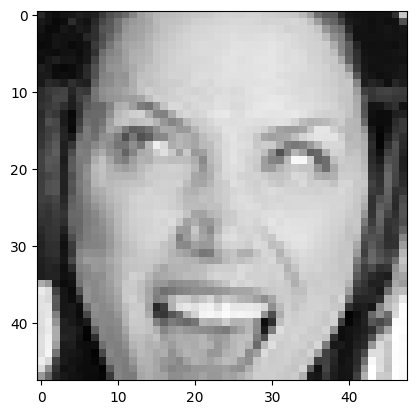

Original class: neutral
1/1 [==============================] - 0s 16ms/step
Predicted class: angry


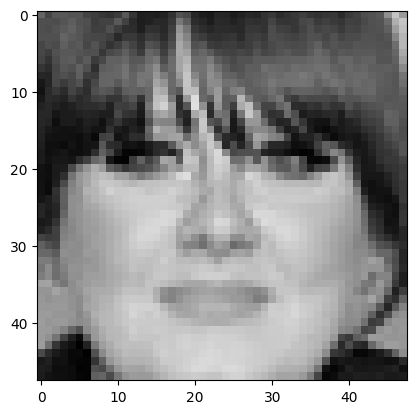

In [ ]:
#to further check the model
from tensorflow.keras.preprocessing import image
for i in range(10):
    a = np.random.randint(7)
    b = np.random.randint(100)
    folder_path = validation + '/' + str(validation_names[a])
    print("Original class:",validation_names[a])
    image_name = [img for img in sorted(os.listdir(folder_path))]
    image_path = folder_path + '/' + image_name[b]
    i1 = cv2.imread(image_path)
    img = image.load_img(image_path, target_size = (48, 48))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis = 0)
    img_array/=255
    y_pred = model.predict(img_array)
    prediction_class = np.argmax(y_pred)
    print("Predicted class:", train_names[prediction_class])
    plt.imshow(i1)
    plt.show()

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
loaded_model = load_model("FaceExpressionModel.keras")


In [ ]:
#Evaluate model performance using appropriate metrics (e.g., accuracy, precision and recall, F1-score).
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  # Import accuracy_score


y_pred = loaded_model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_labels = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())

accuracy = accuracy_score(true_labels, y_pred_classes)
print("Accuracy:", accuracy)

classification_rep = classification_report(true_labels, y_pred_classes, target_names=class_labels)
print("Classification Report:\n", classification_rep)

confusion_mat = confusion_matrix(true_labels, y_pred_classes)
print("Confusion Matrix:\n", confusion_mat)


56/56 [==============================] - 6s 102ms/step
Accuracy: 0.17831870931219926
Classification Report:
               precision    recall  f1-score   support

       angry       0.17      0.17      0.17       960
     disgust       0.01      0.01      0.01       111
        fear       0.14      0.13      0.13      1018
       happy       0.26      0.27      0.26      1825
     neutral       0.17      0.19      0.18      1216
         sad       0.15      0.14      0.15      1139
    surprise       0.12      0.11      0.11       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.14      7066
weighted avg       0.18      0.18      0.18      7066

Confusion Matrix:
 [[159   6 120 251 169 147 108]
 [ 14   1  14  28  22  20  12]
 [132  10 131 271 222 151 101]
 [236  19 233 489 378 296 174]
 [172  14 152 339 231 188 120]
 [137  14 167 293 226 163 139]
 [112  10 115 214 151 109  86]]
